In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as stats
import seaborn as sns

In [3]:
rcParams['pdf.fonttype']=42
rcParams['font.family']='sans-serif'
rcParams['font.size']=10

In [4]:
hits = pd.read_table('highly-filtered-hits-12kEdges-133features-PCCge248-dPCCge100.txt', sep='\t')
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Condition  12488 non-null  object 
 1   Gene1      12488 non-null  object 
 2   Gene2      12488 non-null  object 
 3   PCC_all    12488 non-null  float64
 4   PCC_L1out  12488 non-null  float64
 5   dPCC       12488 non-null  float64
 6   Pval       12488 non-null  float64
dtypes: float64(4), object(3)
memory usage: 683.1+ KB


In [5]:
hits_pos = hits[ hits.dPCC > 0]
hits_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3261 entries, 0 to 12487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Condition  3261 non-null   object 
 1   Gene1      3261 non-null   object 
 2   Gene2      3261 non-null   object 
 3   PCC_all    3261 non-null   float64
 4   PCC_L1out  3261 non-null   float64
 5   dPCC       3261 non-null   float64
 6   Pval       3261 non-null   float64
dtypes: float64(4), object(3)
memory usage: 203.8+ KB


In [6]:
hits_neg = hits[ hits.dPCC < 0]
hits_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 31 to 12485
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Condition  9227 non-null   object 
 1   Gene1      9227 non-null   object 
 2   Gene2      9227 non-null   object 
 3   PCC_all    9227 non-null   float64
 4   PCC_L1out  9227 non-null   float64
 5   dPCC       9227 non-null   float64
 6   Pval       9227 non-null   float64
dtypes: float64(4), object(3)
memory usage: 576.7+ KB


In [7]:
edges_by_feature_pos = hits_pos.groupby('Condition')['Pval'].count().sort_values(ascending=False).to_frame()
edges_by_feature_pos

,Pval
Condition,
TP53_GOF,584
blood,425
Suspension,293
plasma_cell,201
SLC28A2_LOF,116
...,...
WDFY3_LOF,1
RBM10_LOF,1
PCSK5_LOF,1


In [8]:
is_gof_pos = [x for x in edges_by_feature_pos.index.values if '_GOF' in x]

In [9]:
is_lof_pos = [x for x in edges_by_feature_pos.index.values if '_LOF' in x]

In [10]:
num_gof_pos = len(is_gof_pos)
num_lof_pos = len(is_lof_pos)
num_other   = edges_by_feature_pos.shape[0] - num_gof_pos - num_lof_pos
print(num_gof_pos, num_lof_pos, num_other)

9 91 33


In [11]:
hits_pos_gof = len( [x for x in hits_pos.Condition if '_GOF' in x])
hits_pos_lof = len( [x for x in hits_pos.Condition if '_LOF' in x])
hits_pos_other = hits_pos.shape[0] - hits_pos_gof - hits_pos_lof
print( hits_pos_gof, hits_pos_lof, hits_pos_other)

851 756 1654


In [12]:
edges_by_feature_neg = hits_neg.groupby('Condition')['Pval'].count().sort_values(ascending=False).to_frame()
is_gof_neg = [x for x in edges_by_feature_neg.index.values if '_GOF' in x]
is_lof_neg = [x for x in edges_by_feature_neg.index.values if '_LOF' in x]
num_gof_neg = len(is_gof_neg)
num_lof_neg = len(is_lof_neg)
num_other_neg   = edges_by_feature_neg.shape[0] - num_gof_neg - num_lof_neg
print(num_gof_neg, num_lof_neg, num_other_neg)

6 7 16


In [13]:
hits_neg_gof = len( [x for x in hits_neg.Condition if '_GOF' in x])
hits_neg_lof = len( [x for x in hits_neg.Condition if '_LOF' in x])
hits_neg_other = hits_neg.shape[0] - hits_neg_gof - hits_neg_lof
print( hits_neg_gof, hits_neg_lof, hits_neg_other)

8993 109 125


In [ ]:
#
# make figs 2c,d,e,f
#

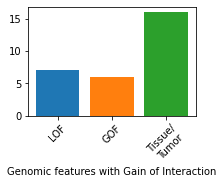

In [30]:
figure( figsize(3,2))
bar( [0], [num_lof_neg], facecolor=sns.color_palette("tab10")[0])
bar( [1], [num_gof_neg], facecolor=sns.color_palette("tab10")[1])
bar( [2], [num_other_neg], facecolor=sns.color_palette("tab10")[2])
xticks( [0,1,2], ['LOF','GOF','Tissue/\nTumor'], rotation=45)
xlabel('Genomic features with Gain of Interaction')
savefig('./Figures/Fig_2_C.pdf')
savefig('./Figures/Fig_2_C.png')
show()

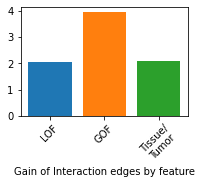

In [31]:
figure( figsize(3,2))
bar( [0], log10([hits_neg_lof]), facecolor=sns.color_palette("tab10")[0])
bar( [1], log10([hits_neg_gof]), facecolor=sns.color_palette("tab10")[1])
bar( [2], log10([hits_neg_other]), facecolor=sns.color_palette("tab10")[2])
xticks( [0,1,2], ['LOF','GOF','Tissue/\nTumor'], rotation=45)
xlabel('Gain of Interaction edges by feature')
savefig('./Figures/Fig_2_D.pdf')
savefig('./Figures/Fig_2_D.png')
show()

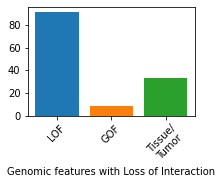

In [32]:
figure( figsize(3,2))
bar( [0], [num_lof_pos], facecolor=sns.color_palette("tab10")[0])
bar( [1], [num_gof_pos], facecolor=sns.color_palette("tab10")[1])
bar( [2], [num_other], facecolor=sns.color_palette("tab10")[2])
xticks( [0,1,2], ['LOF','GOF','Tissue/\nTumor'], rotation=45)
xlabel('Genomic features with Loss of Interaction')
savefig('./Figures/Fig_2_E.pdf')
savefig('./Figures/Fig_2_E.png')
show()

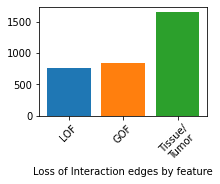

In [33]:
figure( figsize(3,2))
bar( [0], [hits_pos_lof], facecolor=sns.color_palette("tab10")[0])
bar( [1], [hits_pos_gof], facecolor=sns.color_palette("tab10")[1])
bar( [2], [hits_pos_other], facecolor=sns.color_palette("tab10")[2])
xticks( [0,1,2], ['LOF','GOF','Tissue/\nTumor'], rotation=45)
xlabel('Loss of Interaction edges by feature')
savefig('./Figures/Fig_2_F.pdf')
savefig('./Figures/Fig_2_F.png')
show()

In [17]:
hits_neg.groupby('Condition').count()

,Gene1,Gene2,PCC_all,PCC_L1out,dPCC,Pval
Condition,,,,,,
AML,8,8,8,8,8,8
ARID1A_LOF,2,2,2,2,2,2
BRAF_GOF,5,5,5,5,5,5
CEP164_LOF,1,1,1,1,1,1
Ewing_sarcoma,5,5,5,5,5,5
KRAS_GOF,14,14,14,14,14,14
MS4A1_LOF,1,1,1,1,1,1
MYH14_LOF,5,5,5,5,5,5
NRAS_GOF,3,3,3,3,3,3


In [18]:
8958/9227

0.9708464289584914

In [19]:
9227 - 8958

269